# Fraud Detection Project
Download data from Kaggle: FraudChallengeData.zip 

## Get dataset up and working

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv("fraud_challenge_150k.csv", header=None, low_memory=False,
                      names = ["account_age_days", "transaction_amt", "transaction_adj_amt", "historic_velocity", "ip_address", "user_agent", "email_domain", "phone_number", "billing_city", "billing_postal", "billing_state", "card_bin", "currency", "cvv", "signature_image", "transaction_type", "transaction_env", "EVENT_TIMESTAMP", "applicant_name", "billing_address", "merchant_id", "locale", "tranaction_initiate", "days_since_last_logon", "inital_amount", "EVENT_LABEL"])
#drop first row that was useless
dataset.drop(0, inplace = True)

#drop columns we will not be using
dataset.drop(columns=['ip_address', 'user_agent', 'phone_number', 'email_domain', 'card_bin', 'billing_city', 'billing_postal', 'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address', 'merchant_id', 'locale', 'tranaction_initiate', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type'], inplace=True)

#delete rows with 'na' values
dataset = dataset.dropna()

#replace 'legit' with 0 and 'fraud' with 1 in the EVENT_LABEL column
dataset['EVENT_LABEL'].replace('legit', 0, inplace=True)
dataset['EVENT_LABEL'].replace('fraud', 1, inplace=True)

for elem in dataset:
    dataset[elem] = dataset[elem].astype(float)

## Print out graphs

::Forged::
account_age_days
min: 931.0
max: 8722.0
mean: 5274.927198817442 
sd: 830.4946266355848.

transaction_amt
min: 814.0
max: 4999.0
mean: 2833.6437546193642 
sd: 474.7237209971329.

transaction_adj_amt
min: 1.0
max: 78.0
mean: 38.92288741069229 
sd: 10.657466174261407.

historic_velocity
min: 862.0
max: 8732.0
mean: 4723.973022912047 
sd: 1168.3332287222063.

days_since_last_logon
min: 0.0
max: 100.0
mean: 49.80315348608031 
sd: 29.20797000475699.

::Authentic::
account_age_days
min: 1.0
max: 9119.0
mean: 4609.8114005568505
sd: 1159.3925701260318.

transaction_amt
min: 5.0
max: 4844.0
mean: 2503.5247217518827
sd: 606.2302540666274.

transaction_adj_amt
min: 15.0
max: 99.0
mean: 55.08092751733959
sd: 9.300708083066011.

historic_velocity
min: 50.0
max: 9999.0
mean: 4701.395881006865
sd: 1189.6965648305243.

days_since_last_logon
min: 0.0
max: 100.0
mean: 49.87025950931981
sd: 29.203414639123718.



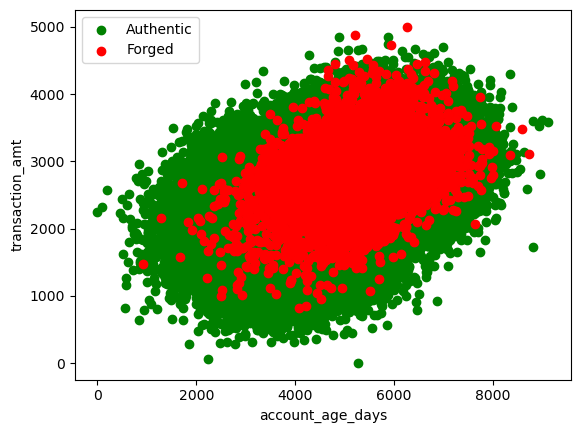

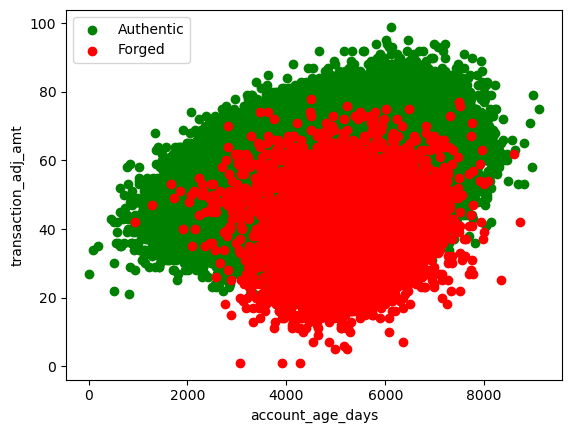

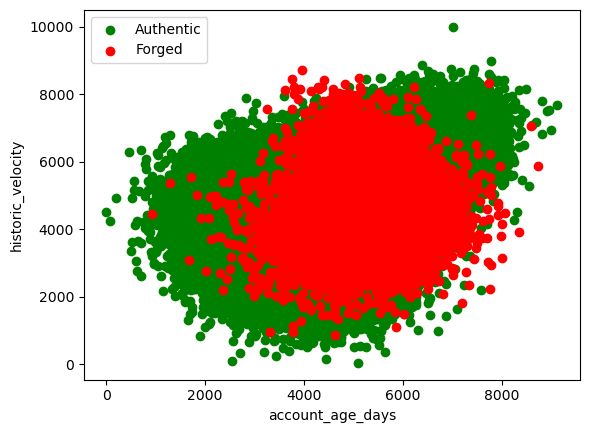

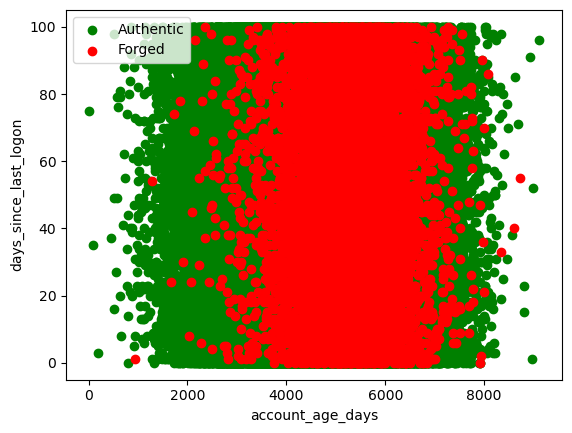

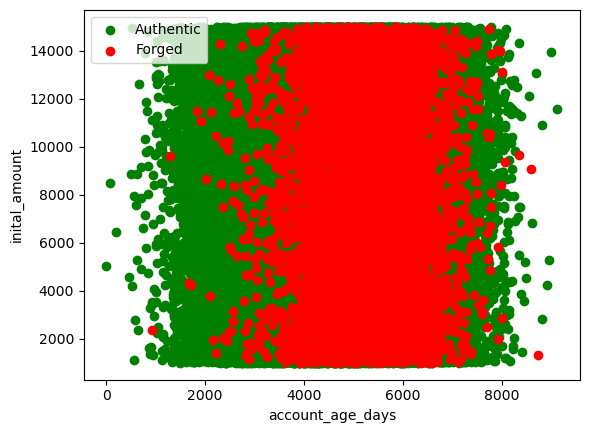

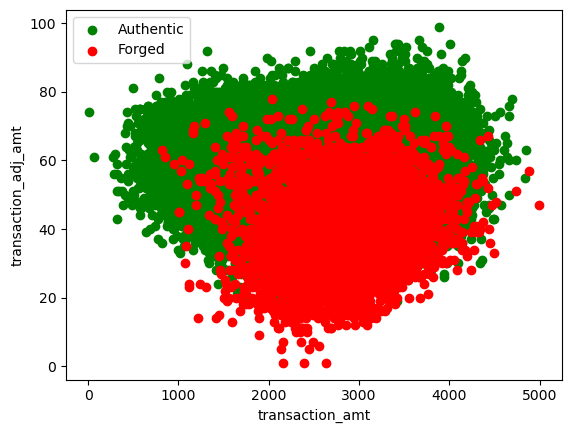

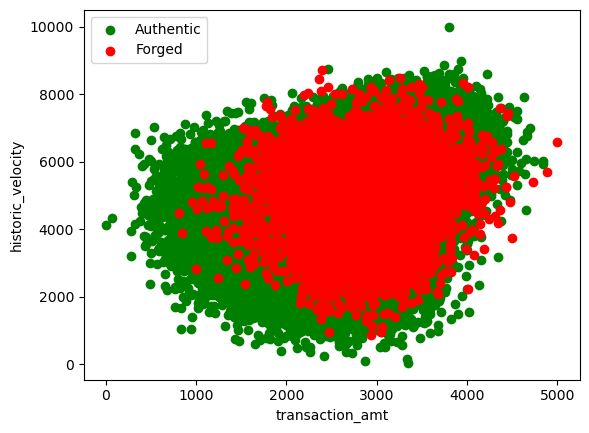

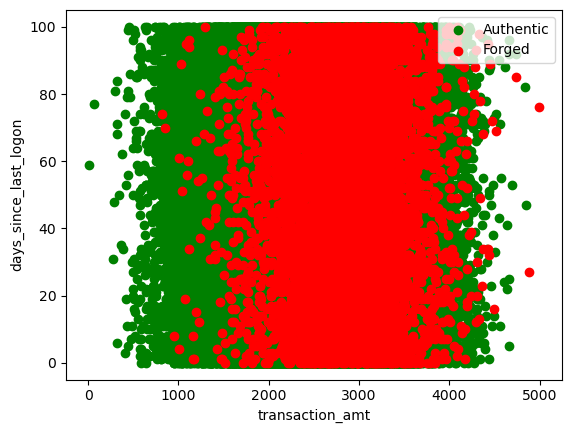

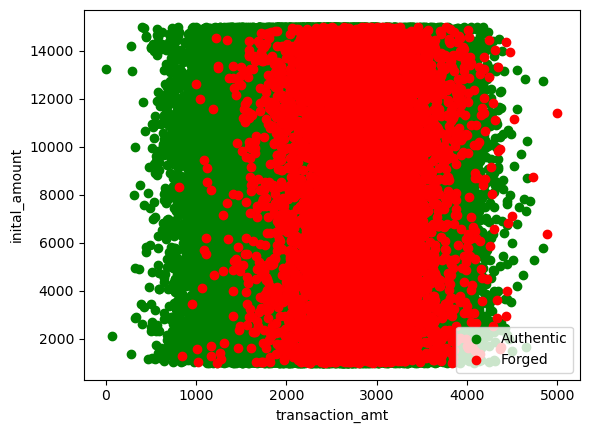

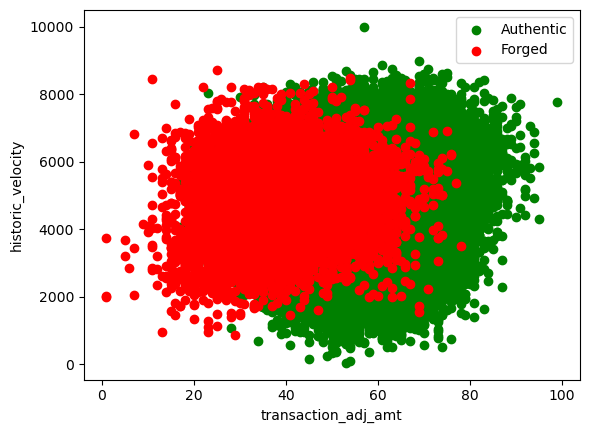

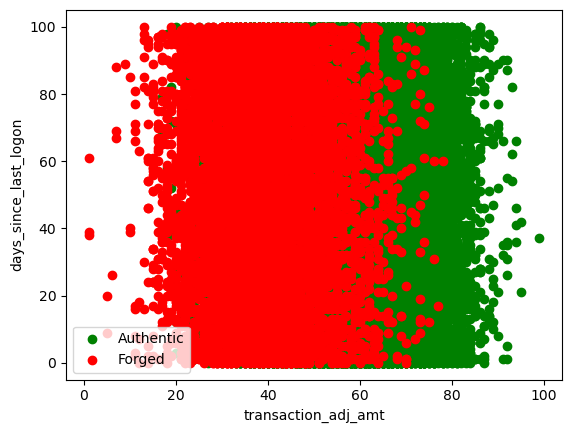

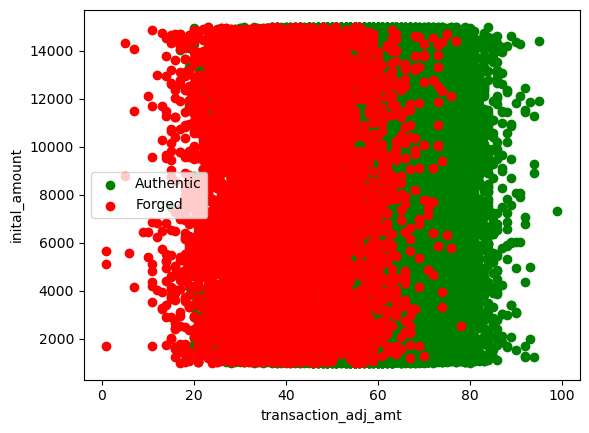

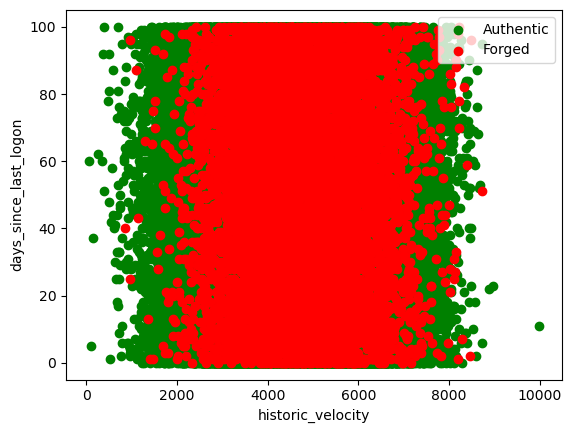

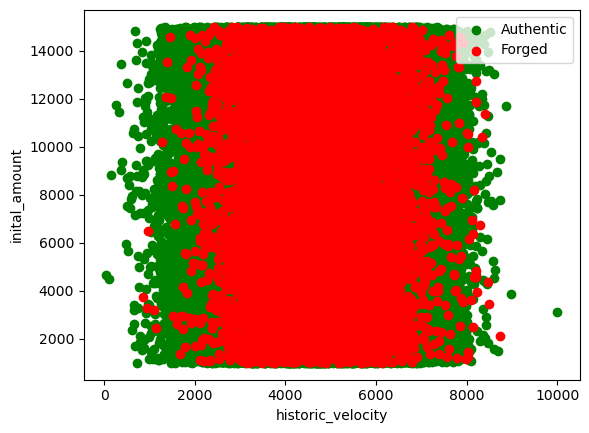

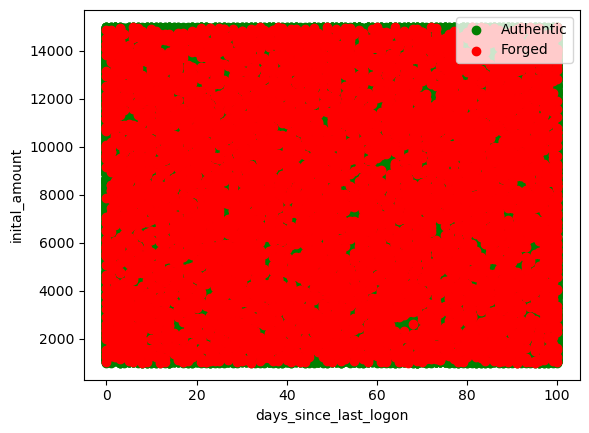

141151
8118


In [2]:
authentic = dataset[ dataset['EVENT_LABEL'] == 0.0]
forged = dataset[ dataset['EVENT_LABEL'] == 1.0]

names = ["account_age_days", "transaction_amt", "transaction_adj_amt", "historic_velocity", "days_since_last_logon", "inital_amount"]

print("::Forged::") #print simple statistical analysis for fraud
for i in names[:-1]:
    min_forged = forged[i].min()
    max_forged = forged[i].max()
    mean_forged = forged[i].mean()
    sd_forged = forged[i].std()
    print(i)
    print(f"min: {min_forged}\nmax: {max_forged}\nmean: {mean_forged} \nsd: {sd_forged}.\n")   

print("::Authentic::") #print simple statistical analysis for legit
for i in names[:-1]:
    min_authentic = authentic[i].min()
    max_authentic = authentic[i].max()
    mean_authentic = authentic[i].mean()
    sd_authentic = authentic[i].std()
    print(i)
    print(f"min: {min_authentic}\nmax: {max_authentic}\nmean: {mean_authentic}\nsd: {sd_authentic}.\n")

for i in range(len(names)):
    for j in range(i + 1, len(names)):
        plt.scatter(authentic[names[i]], authentic[names[j]], c='green', label="Authentic")
        plt.scatter(forged[names[i]], forged[names[j]], c='red', label="Forged")
        plt.xlabel(names[i])
        plt.ylabel(names[j])
        plt.legend()
        plt.show()
        
print(len(authentic))
print(len(forged))

## ANN Model:

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# make the classifier ANN
clf = MLPClassifier(solver='adam', random_state=2)

# split data into test and train sets at an 80:20 ratio
#X = dataset[["account_age_days", "transaction_amt", "transaction_adj_amt", "historic_velocity", "days_since_last_logon", "inital_amount"]]
X = dataset[names]
y = dataset['EVENT_LABEL']

x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=25)

# fit data on our model
clf.fit(x_train, y_train)

MLPClassifier(random_state=2)

In [4]:
# score the model on the training and testing data
from sklearn import metrics


#test the classifier on the data it was trained on
prediction_training = clf.predict(x_train)
print("FOR ANN on training data:")
print("Accuracy:",metrics.accuracy_score(y_train, prediction_training))
print(metrics.classification_report(y_train, prediction_training, zero_division=0)) #error computing f1 score
print(metrics.confusion_matrix(y_train, prediction_training))

#test the classifier on the data it was trained on
prediction_testing = clf.predict(x_test)
print("FOR ANN on testing data:")
print("Accuracy:",metrics.accuracy_score(y_test, prediction_testing))
print(metrics.classification_report(y_test, prediction_testing, zero_division=0)) #error computing f1 score
print(metrics.confusion_matrix(y_test, prediction_testing))

FOR ANN on training data:
Accuracy: 0.9477620064481012
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    112891
         1.0       0.94      0.05      0.09      6524

    accuracy                           0.95    119415
   macro avg       0.94      0.52      0.53    119415
weighted avg       0.95      0.95      0.92    119415

[[112870     21]
 [  6217    307]]
FOR ANN on testing data:
Accuracy: 0.9487840825350037
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     28260
         1.0       0.88      0.05      0.09      1594

    accuracy                           0.95     29854
   macro avg       0.92      0.52      0.53     29854
weighted avg       0.95      0.95      0.93     29854

[[28250    10]
 [ 1519    75]]


## GNB Model:

In [5]:
from sklearn.naive_bayes import GaussianNB

#Change data type to float and put the name of each columns into a list
col = []
for i in dataset:
    dataset[col] = dataset[col].astype(float)
    col.append(i) # add col names to a list

authentic = dataset.loc[dataset["EVENT_LABEL"]==0]
forged = dataset.loc[dataset["EVENT_LABEL"]==1]


#GNB - Assuming all features to be normal distribution. 
input_features = dataset[col[:-1]]
class_label = dataset[col[-1]]
#split data set 0.80 for training and 0.20 for testing
x_train, x_test, y_train, y_test = train_test_split(input_features, class_label, test_size = 0.20, random_state = 0)
print("\n\t\t::GaussianNB::\n")
model = GaussianNB()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("GNB Prediction on Training Data")
print ("Accuracy:", metrics. accuracy_score (y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.confusion_matrix(y_train, y_train_pred))

print("\n\n\nGNB Prediction on Testing Data")
print ("Accuracy:", metrics. accuracy_score (y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))


		::GaussianNB::

GNB Prediction on Training Data
Accuracy: 0.9556923334589457
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    112915
         1.0       0.70      0.33      0.45      6500

    accuracy                           0.96    119415
   macro avg       0.83      0.66      0.71    119415
weighted avg       0.95      0.96      0.95    119415

[[111999    916]
 [  4375   2125]]



GNB Prediction on Testing Data
Accuracy: 0.9577276076907617
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     28236
         1.0       0.72      0.36      0.48      1618

    accuracy                           0.96     29854
   macro avg       0.84      0.68      0.73     29854
weighted avg       0.95      0.96      0.95     29854

[[28007   229]
 [ 1033   585]]


## KNN Model:

In [6]:
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=25)
model = KNeighborsClassifier(3)
# fit data on our model
model.fit(x_train, y_train)
#test the classifier on the data it was trained on
prediction_training = model.predict(x_train)
print("FOR KNN on training data:")
print("Accuracy:",metrics.accuracy_score(y_train, prediction_training))
print(metrics.classification_report(y_train, prediction_training, zero_division=0)) #error computing f1 score
print(metrics.confusion_matrix(y_train, prediction_training))

#test the classifier on the data it was trained on
prediction_testing = model.predict(x_test)
print("FOR KNN on testing data:")
print("Accuracy:",metrics.accuracy_score(y_test, prediction_testing))
print(metrics.classification_report(y_test, prediction_testing, zero_division=0)) #error computing f1 score
print(metrics.confusion_matrix(y_test, prediction_testing))

FOR KNN on training data:
Accuracy: 0.9547628019930494
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    112891
         1.0       0.73      0.27      0.40      6524

    accuracy                           0.95    119415
   macro avg       0.85      0.63      0.69    119415
weighted avg       0.95      0.95      0.94    119415

[[112248    643]
 [  4759   1765]]
FOR KNN on testing data:
Accuracy: 0.9378307764453675
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     28260
         1.0       0.28      0.10      0.15      1594

    accuracy                           0.94     29854
   macro avg       0.61      0.54      0.56     29854
weighted avg       0.92      0.94      0.92     29854

[[27833   427]
 [ 1429   165]]
